In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd 
import numpy as np 

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

# 常用聚合函数


|指标|描述|
| --------   | -----:  |
| count()        |  计数项     |  
|    first()、last()     |   第一项和最后一项    | 
| mean()、median()        |  均值与中位数    |  
| min()、max()        | 最大值与最小值      |   
| std()、var()        |  标准差与方差     |  
| mad()        |   均值绝对偏差    |  
| prod()        |  所有项乘积     | 
| sum()        |   所有项求和    |   

In [5]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")

titanic=titanic.loc[:,["船舱等级","年龄"]]
titanic.head()

,船舱等级,年龄
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0


In [4]:
titanic.mean()  #axis可以设置为"columns"（等同于1）或者"index"（等同于0）

船舱等级     2.308642
年龄      29.699118
dtype: float64

```
    
   
   
    
   
   
```
# groupby分组
## 分组与聚合

In [5]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")
titanic_01=titanic.head().loc[:,["性别","年龄","船舱等级"]]  #取前五行出来举例子
titanic_01

,性别,年龄,船舱等级
0,男,22.0,3
1,女,38.0,1
2,女,26.0,3
3,女,35.0,1
4,男,35.0,3


In [6]:
titanic_01.groupby("性别")["年龄"].mean()

性别
女    33.0
男    28.5
Name: 年龄, dtype: float64

groupby操作是如何实现的？

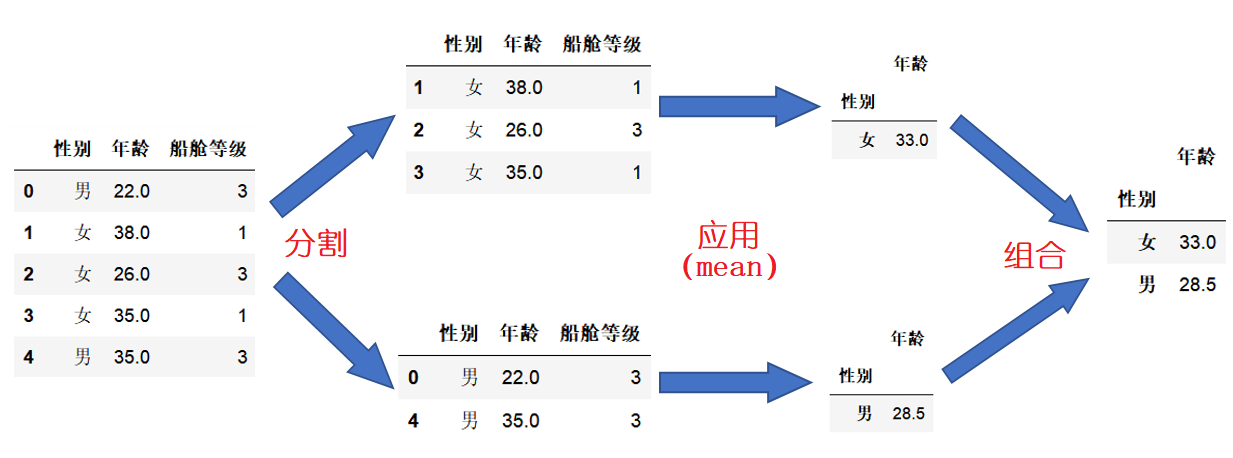

In [6]:
#分割
titanic_01.groupby("性别")

#应用与组合
titanic_01.groupby("性别")["年龄"].mean()

性别
女    33.0
男    28.5
Name: 年龄, dtype: float64

DataFrame和Series的方法都可以由GroupBy方法调用：

In [7]:
titanic_01.groupby("性别").mean()

,年龄,船舱等级
性别,,
女,33.0,1.666667
男,28.5,3.000000


```

    
   
   
```
## 探究groupby对象

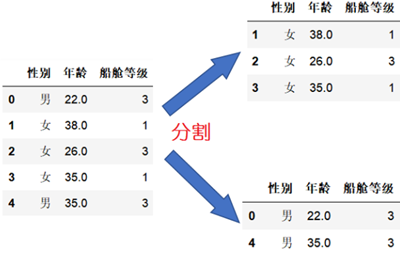

In [12]:
titanic_01

,性别,年龄,船舱等级
0,男,22.0,3
1,女,38.0,1
2,女,26.0,3
3,女,35.0,1
4,男,35.0,3


In [13]:
titanic_01.groupby("性别")

groupby对象其实是可以直接按组进行迭代的，每一组都是Series或DataFrame,如果我们将上面的groupby对象转化为list来看，你会发现：

In [14]:
list(titanic_01.groupby("性别"))

[('女',   性别    年龄  船舱等级
  1  女  38.0     1
  2  女  26.0     3
  3  女  35.0     1), ('男',   性别    年龄  船舱等级
  0  男  22.0     3
  4  男  35.0     3)]

In [18]:
for i,j in titanic_01.groupby("性别"):
    print("分组的组名为——%s"%i)
    print("这组名对应的pandas对象是：")
    print(j,"\n")

分组的组名为——女
这组名对应的pandas对象是：
  性别    年龄  船舱等级
1  女  38.0     1
2  女  26.0     3
3  女  35.0     1 

分组的组名为——男
这组名对应的pandas对象是：
  性别    年龄  船舱等级
0  男  22.0     3
4  男  35.0     3 



In [19]:
type(j)

pandas.core.frame.DataFrame

```

   
   
```
## 依据多个键分组

In [22]:
titanic_01

,性别,年龄,船舱等级
0,男,22.0,3
1,女,38.0,1
2,女,26.0,3
3,女,35.0,1
4,男,35.0,3


如果想依据多个键进行分割，groupby()中设定多个字段名的列表即可：

In [23]:
pd.DataFrame(titanic_01.groupby(["性别","船舱等级"])["年龄"].mean())

年龄
性别 船舱等级      
女  1     36.5
   3     26.0
男  3     28.5

```

   
   
```
## 依据自定义键分组

In [29]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")
titanic_01=titanic.head().loc[:,["性别","年龄","船舱等级"]]
titanic_01

,性别,年龄,船舱等级
0,男,22.0,3
1,女,38.0,1
2,女,26.0,3
3,女,35.0,1
4,男,35.0,3


如果现在有新的一列，记录上面五个人游泳技能水平,0表示不会游泳，1表示游泳一般，2表示游泳技能较好。

In [31]:
swim=[2,0,0,1,0]  #swim还可以是数组、series、或者是索引...

如果我们想按照swim中游泳技能水平的3档进行分组，查看不同游泳水平的性别人数分布：

In [32]:
titanic_01.groupby([swim,"性别"])["性别"].count()

   性别
0  女     2
   男     1
1  女     1
2  男     1
Name: 性别, dtype: int64

```
 
   
   
```
## 依据索引映射分组

In [33]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")
titanic_01=titanic.head().loc[:,["性别","年龄","船舱等级"]]
titanic_01

,性别,年龄,船舱等级
0,男,22.0,3
1,女,38.0,1
2,女,26.0,3
3,女,35.0,1
4,男,35.0,3


上面的swim还可以换成字典或Series,使用映射的方式对数据进行分组。  
比如，我们将swim换成用来记载这5个人的国籍信息的字典：

In [34]:
country={0:"American",1:"British",2:"American",3:"Irishman",4:"British"}

titanic_01.groupby([country,"性别"])["性别"].count()

          性别
American  女     1
          男     1
British   女     1
          男     1
Irishman  女     1
Name: 性别, dtype: int64

当然上面是通过字典来将索引映射到分组键，通过函数来将索引映射到分组键也是可以的：

In [35]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")
titanic_01=titanic.head().loc[:,["性别","年龄","船舱等级"]]
titanic_01

def func(x):
    if x in [0,2]:
        return "American"
    elif x in [1,4]:
        return "British"
    else:
        return "Irishman"
    
titanic_01.groupby([func,"性别"])["性别"].count()

,性别,年龄,船舱等级
0,男,22.0,3
1,女,38.0,1
2,女,26.0,3
3,女,35.0,1
4,男,35.0,3


          性别
American  女     1
          男     1
British   女     1
          男     1
Irishman  女     1
Name: 性别, dtype: int64

```
    
   
   
    
   
   
```
## 分组后累积、过滤、转换、应用

### 分组后合计aggregate()

In [36]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")

titanic.groupby("性别").aggregate([np.max,np.mean])

幸存否           船舱等级              年龄           
   amax      mean amax      mean  amax       mean
性别                                               
女     1  0.742038    3  2.159236  63.0  27.915709
男     1  0.188908    3  2.389948  80.0  30.726645

如果想看不同性别乘客的：船舱等级的中位数、年龄的均值呢？  
把上面aggregate()中的列表换成带映射关系的字典即可：

In [39]:
titanic.groupby("性别").aggregate({"船舱等级":np.median,"年龄":np.mean})

,船舱等级,年龄
性别,,
女,2,27.915709
男,3,30.726645


```
    
  
   
   
```
### 分组后过滤filter()

如果分组之后，想要对小组数据聚合情况进行组筛选（将属于某类组的数据都删除），该怎么做？  
这时，分组之后可以用filter()方法： 

In [6]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")
titanic.head()

,幸存否,船舱等级,性别,年龄,年龄段
0,0,3,男,22.0,青年
1,1,1,女,38.0,青年
2,1,3,女,26.0,青年
3,1,1,女,35.0,青年
4,0,3,男,35.0,青年


titanic中各年龄段的年龄标准差情况如下:

In [41]:
titanic.groupby("年龄段")["年龄"].std()

年龄段
中年    5.369605
儿童    3.390390
少年    1.438688
老年    5.024884
青年    6.027229
Name: 年龄, dtype: float64

使用filter()方法，将年龄标准差小于2的年龄组删除,只保留标准差大于等于2的年龄组：

In [8]:
def filer_func(x):
    return x["年龄"].std()>2     #这里面的x其实是用来传输groupby对象的每一小组

titanic_02=titanic.groupby("年龄段").filter(filer_func)
titanic_02.head()

,幸存否,船舱等级,性别,年龄,年龄段
0,0,3,男,22.0,青年
1,1,1,女,38.0,青年
2,1,3,女,26.0,青年
3,1,1,女,35.0,青年
4,0,3,男,35.0,青年


In [9]:
titanic_02.groupby("年龄段")["年龄"].std()

年龄段
中年    5.369605
儿童    3.390390
老年    5.024884
青年    6.027229
Name: 年龄, dtype: float64

```
    
   
   
```
### 分组后转换transform()

转换操作返回一个新的全量数据,数据转换之后的形状和原来的是一样的，常见的例子是实现数据标准化：

In [10]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0").dropna()
titanic_03=titanic.loc[:,["年龄段","年龄"]]
titanic_03.head()

,年龄段,年龄
0,青年,22.0
1,青年,38.0
2,青年,26.0
3,青年,35.0
4,青年,35.0


如果我们想以年龄分组，对每个人的年龄进行组内标准化(每个人的年龄减去自己年龄组的年龄均值):

In [11]:
def standar(x):
    return x-x.mean()  #这里面的x其实是用来传输groupby对象的每一小组，x-x.mean()其实用了广播
    
titanic_03.groupby("年龄段").transform(standar)

,年龄
0,-6.365882
1,9.634118
2,-2.365882
3,6.634118
4,6.634118
...,...
885,10.634118
886,-1.365882
887,-9.365882
889,-2.365882


```
    
  
   
   
```
### 分组后应用apply()

如果你想在分组后对小组使用任意方法，可以使用apply()。
- 输入一个分组数据的DataFrame进apply()，可以返回一个DataFrame或Series或一个标量。
- group()和apply()的组合操作可以适应apply()返回的结果类型，因此非常灵活。

In [45]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0").dropna()
titanic_03=titanic.loc[:,["性别","年龄段","年龄"]]
titanic_03.head()

,性别,年龄段,年龄
0,男,青年,22.0
1,女,青年,38.0
2,女,青年,26.0
3,女,青年,35.0
4,男,青年,35.0


In [46]:
# list(titanic_03.groupby("年龄段"))[0]  #都是年龄段为中年的数据
titanic_03.groupby("年龄段")["性别"].value_counts()

年龄段  性别
中年   男      83
     女      45
儿童   男      37
     女      32
少年   女      36
     男      34
老年   男      19
     女       3
青年   男     280
     女     145
Name: 性别, dtype: int64

如果我们想以“年龄段”为分组，如果这个年龄段的男性多，则将该年龄段改为“男多年龄段”，反正亦然：

In [47]:
def more(x):
    i=x["性别"].value_counts().index[0]   #这里面的x其实是用来传输groupby对象中的每一小组
    return "%s多年龄段"%i

titanic_03.groupby("年龄段").apply(more)

年龄段
中年    男多年龄段
儿童    男多年龄段
少年    女多年龄段
老年    男多年龄段
青年    男多年龄段
dtype: object

In [48]:
def more(x):
    i=x["性别"].value_counts().index[0]
    return "船舱%s性多"%i

titanic.groupby("船舱等级").apply(more)

船舱等级
1    船舱男性多
2    船舱男性多
3    船舱男性多
dtype: object

```
   
    
   
   
```
## 练习
依照上面的例子，如果求出不同性别的乘客的：
- 不同性别组的频数最高的乘客船舱等级分别是什么等级？  
（男性最多人坐什么等级的船舱？女性最多人坐什么等级的船舱？）
- 年龄的中位数。

In [6]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")
titanic.head()

,幸存否,船舱等级,性别,年龄,年龄段
0,0,3,男,22.0,青年
1,1,1,女,38.0,青年
2,1,3,女,26.0,青年
3,1,1,女,35.0,青年
4,0,3,男,35.0,青年


In [41]:
def most(x):
    i=x["船舱等级"].value_counts().index[0]
    return "%s等舱最多人坐"%i

titanic.groupby("性别").apply(most)

性别
女    3等舱最多人坐
男    3等舱最多人坐
dtype: object

In [8]:
def most(x):
    return "%s等舱最多人坐"%x["船舱等级"].value_counts().index[0]

titanic.groupby("性别").apply(most)

性别
女    3等舱最多人坐
男    3等舱最多人坐
dtype: object

In [10]:
titanic.filter("性别"=="男")

TypeError: 'bool' object is not iterable

In [11]:
titanic.groupby("性别").median()

,幸存否,船舱等级,年龄
性别,,,
女,1,2,27.0
男,0,3,29.0


```
    
   
   
    
   
   
```
# 透视表

##  pd.pivot_table()
```
pd.pivot_table(values=None, index=None, columns=None, aggfunc='mean',     
                fill_value=None, margins=False, dropna=True, margins_name='All')
```
- values：要聚合的列，可选
- index：在数据透视表索引上分组的键。
- columns：在数据透视表列上分组的键。
- aggfunc：function，function of list，dict，default numpy.mean
    - 如果传递的函数列表，则生成的数据透视表将具有分层列。
    - 如果传递了dict，则键是要聚合的列，值是函数或函数列表。
- fill_value：标量，默认无，用于替换缺失值的值。
- margin：boolean，默认为False，添加所有行/列（例如，对于小计/总计）。
- dropna：布尔值，默认为True，不包括条目全部为NaN的列
- margins_name：string，默认为'All'，当边距为真时，将包含总计的行/列的名称。

In [71]:
titanic=pd.read_csv("titanic.csv",encoding="utf_8",index_col="Unnamed: 0")
titanic.head()

,幸存否,船舱等级,性别,年龄,年龄段
0,0,3,男,22.0,青年
1,1,1,女,38.0,青年
2,1,3,女,26.0,青年
3,1,1,女,35.0,青年
4,0,3,男,35.0,青年


如果我们想要查看泰坦尼克乘客的生存率状况，从性别和船舱等级两个维度观察：

In [72]:
titanic.pivot_table("幸存否",index="性别",columns="船舱等级")

船舱等级,1,2,3
性别,,,
女,0.968085,0.921053,0.500000
男,0.368852,0.157407,0.135447


默认多维分析的对象是均值。

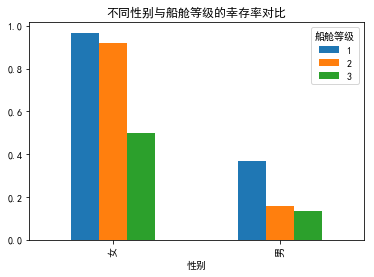

In [74]:
df=titanic.pivot_table("幸存否",index="性别",columns="船舱等级")
df.plot(kind="bar",title="不同性别与船舱等级的幸存率对比");

### 参数aggfunc

如果我们多维分析"幸存否"的不是均值，而是人数，这时候就需要用aggfunc参数额外设定：

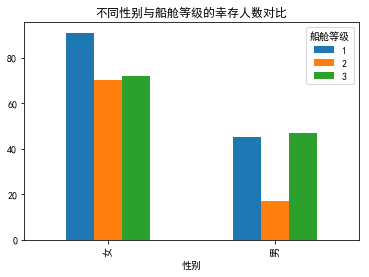

In [75]:
df=titanic.pivot_table("幸存否",index="性别",columns="船舱等级",aggfunc="sum")
df.plot(kind="bar",title="不同性别与船舱等级的幸存人数对比");

如果我们想求幸存者的人数，也想求幸存者的平均年龄：

In [77]:
titanic.pivot_table(index="性别",columns="船舱等级",aggfunc={"幸存否":"sum","年龄":"mean"})

年龄                       幸存否        
船舱等级          1          2          3   1   2   3
性别                                               
女     34.611765  28.722973  21.750000  91  70  72
男     41.281386  30.740707  26.507589  45  17  47

### 参数margins

In [78]:
titanic.pivot_table("幸存否",index="性别",columns="船舱等级",aggfunc="sum",margins=True)

船舱等级,1,2,3,All
性别,,,,
女,91,70,72,233
男,45,17,47,109
All,136,87,119,342


```
    
   
      
```
## 多级透视表

In [79]:
titanic.pivot_table("幸存否",index=["性别","年龄段"],columns="船舱等级")

船舱等级           1         2         3
性别 年龄段                              
女  中年   0.958333  0.846154  0.000000
   儿童   0.000000  1.000000  0.478261
   少年   1.000000  1.000000  0.550000
   老年   1.000000       NaN  1.000000
   青年   0.979167  0.914894  0.480000
男  中年   0.342105  0.055556  0.074074
   儿童   1.000000  1.000000  0.360000
   少年   0.500000  0.000000  0.076923
   老年   0.083333  0.333333  0.000000
   青年   0.478261  0.063492  0.146199